<a href="https://colab.research.google.com/github/kcy919/ml_edu/blob/master/Chapter_4_2_cross_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "입문자를 위한 머신러닝 튜토리얼 - 교차검증"
date: 2020-08-20T00:10:47+09:00
tags:
  - "머신러닝"
  - "Python"
  - "Machine Learning"
categories:
  - "머신러닝"
  - "Python"
  - "Machine Learning"
menu: 
  python:
    name: 입문자를 위한 머신러닝 튜토리얼 - 교차검증
---


## 개요 
- 교차검증의 의미를 이해한다.
- 교차검증을 위한 간단한 실습을 진행한다. 

## 교차검증이란
- 교차검증은 기본적으로 과적합을 예방하기 위한 방법론 중 하나이다. 
- 교차검증을 쉽게 이해하는 방법은 수능시험을 보기 위해 수능과 비슷한 유형의 모의고사를 보는 것과 같다. 


### (1) K폴드 교차검증 개요
- 데이터의 수가 적을 때 사용한다. 
  + 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어진다. 
  + 이 때, K-폴드 방법을 사용한다. 
- 그림을 보며 이해하자. 

![](https://cdn-images-1.medium.com/max/1600/1*rgba1BIOUys7wQcXcL4U5A.png)

- 데이터의 편향을 방지하기 위한 것
  + 데이터를 K개로 나누어 K-1개를 분할하고 나머지는 평가에 사용
  + 모델의 검증 점수는 K개의 검증 점수 평균이 된다. 

### (2) 소스코드를 통한 검증
- 이 때 사용되는 함수는 `cross_val_score`가 사용된다. 
  + 참조: [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- 먼저 데이터를 확인한다. 
  + 데이터의 설명서는 공식홈페이지를 참고한다. [Boston house prices dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 데이터 시각화를 진행한다. 

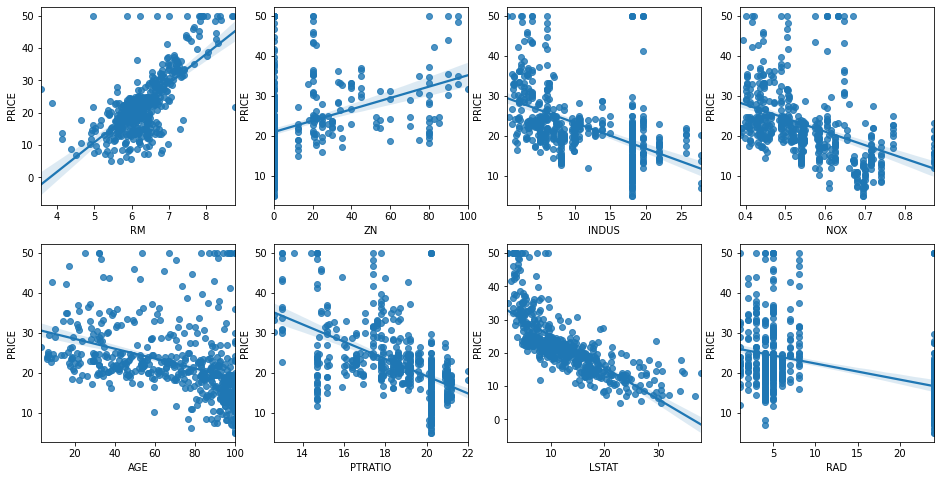

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE', data=bostonDF , ax=axs[row][col])

- 주요 변수별 데이터를 해석할 수 있어야 한다. 
  + RM: RM이 증가할수록 PRICE도 증가하는 경향이 있다. 
- 각각의 변수와 `Price`와의 관계에 대한 직관적인 이해가 필요하다. 
- 질문: 선형성이 가장 큰 것은 무엇인가?
- 이제 회귀 모형을 만들어본다. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


### (3) 모형 평가 검증 기본 설명
- `MAE`는 `Mean Absolute Error(MAE)`이며, 실제 값과 예측값의 차이를 절대값으로 변환해 평균한 것
- `MSE`는 `Mean Squared ERROR(MSE)`이며, 실제값과 예측값의 차이를 제곱해 평균한 것
- `RMSE`는 `MSE`값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 `MSE`에 루트를 씌운 것이 `RMSE`이다.
- $R^2$는 분산 기반으로 예측 성능을 평가하며, 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측의 정확도가 높다. 
- 사이킷런은 `RMSE` 제공하지 않는다. 따라서, 함수를 만든다.  

### (4) K폴드를 활용한 모형 평가 
- 이제 K-Fold를 활용하여 모형을 평가해본다. 
- 이 때, `scoring = neg_mean_squared_error`를 지정하면 반환되는 수치 값은 음수 값이다. 
- 싸이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델이다. 
- 그런데, 일반적으로 회귀는 `MSE`값이 낮을수록 좋은 회귀 모델이 된다. 
- `-1`은 `RMSE`값을 구하기 위해 양수로 출력을 해야 해서 곱해준 것이다. 

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 소결
- 교차검증의 목적은 적은 데이터에서 주로 사용하게 된다. 
- 회귀 모형의 평가는 크게 RMSE와 $R^2$ 이다. 
  + `RMSE`는 작을수록 좋은 모형이고 $R^2$ 클수록 좋은 모형이다. 